In [61]:
import pandas as pd
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_recall_fscore_support, f1_score

sns.set(font_scale=1.3)
sns.set_style()

In [106]:
results_dict = dict()

for testset in os.listdir("./results"):
    print(testset)
    results_dict[testset] = dict()
    for model in os.listdir(f"./results/{testset}"):
        print("\t",model.rstrip(".csv"))
        results_dict[testset][model.rstrip(".csv")] = pd.read_csv(f"./results/{testset}/{model}")

fortuna2019_portuguese_test_2500
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_200_rs1
	 xlmt_dynabench2021_english_100_rs1
	 xlmt_dynabench2021_english_5k_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_10_rs1
	 xlmt_dynabench2021_english_20_rs1
	 xlmt_dynabench2021_english_2k_rs1
	 xlmt_dynabench2021_english_50_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_1000_rs1
	 xlmt_dynabench2021_english_10k_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_500_rs1
	 xlmt_dynabench2021_english_10_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_2000_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_20_rs1
	 xlmt_dynabench2021_english_20k_rs1
	 xlmt_dynabench2021_english_500_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_100_rs1
	 xlmt_dynabench2021_english_200_rs1
	 xlmt_dynabench2021_english_20k_fortuna2019_portuguese_50_rs1
	 xlmt_dynabench2021_english_1k_rs1
sanguinetti2020_italian_test_2500
	 xlmt_dynabench2021_

In [107]:
metrics_dict = copy.deepcopy(results_dict)

for dataset in metrics_dict:
    for model in metrics_dict[dataset]:
        metrics_dict[dataset][model] = f1_score(metrics_dict[dataset][model]["label"],
                                                metrics_dict[dataset][model]["prediction"],
                                                average="macro")

# remove all Englsh-only models but chosen base model
base_model ="xlmt_dynabench2021_english_20k"        
for dataset in metrics_dict:
    for model,_ in list(metrics_dict[dataset].items()):
        if dataset.split("_")[0] not in model and base_model not in model:
            del metrics_dict[dataset][model]
    

In [116]:
metrics_dict["dynabench2021_english_test_2500"]

{'xlmt_dynabench2021_english_100_rs1': 0.5121645579344372,
 'xlmt_dynabench2021_english_5k_rs1': 0.7623549640261806,
 'xlmt_dynabench2021_english_20_rs1': 0.3494665625813167,
 'xlmt_dynabench2021_english_2k_rs1': 0.7104286956567838,
 'xlmt_dynabench2021_english_50_rs1': 0.4457291443563933,
 'xlmt_dynabench2021_english_10k_rs1': 0.7766940422932664,
 'xlmt_dynabench2021_english_10_rs1': 0.35215417990123127,
 'xlmt_dynabench2021_english_20k_rs1': 0.7944199140289778,
 'xlmt_dynabench2021_english_500_rs1': 0.6443871979391258,
 'xlmt_dynabench2021_english_200_rs1': 0.5953697158695408,
 'xlmt_dynabench2021_english_1k_rs1': 0.6927748495477982}

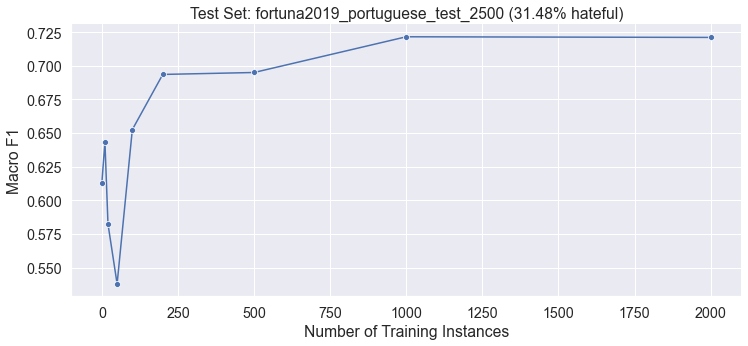

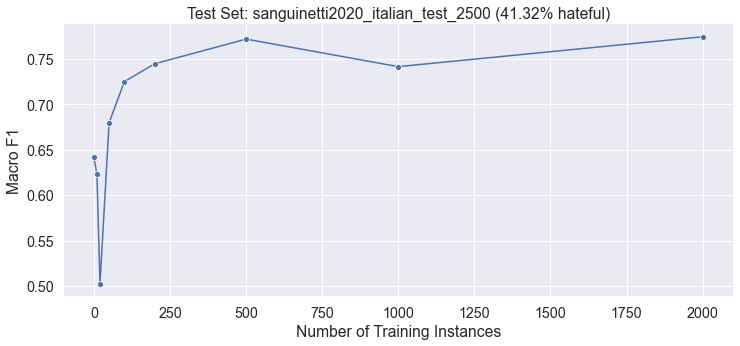

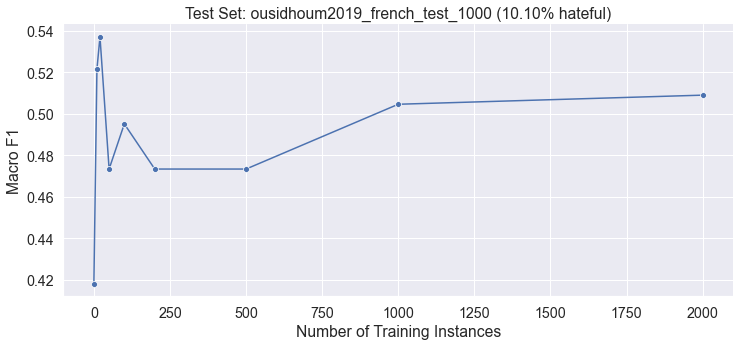

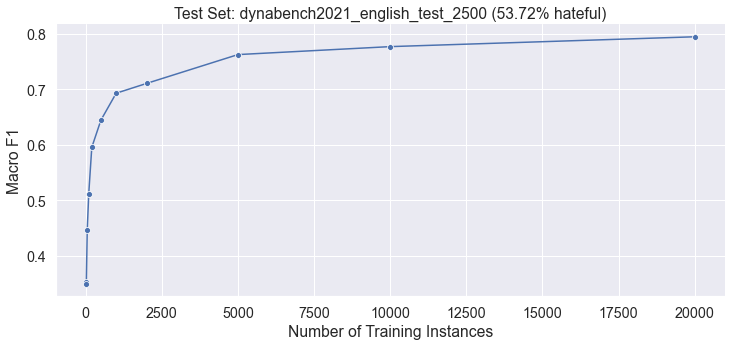

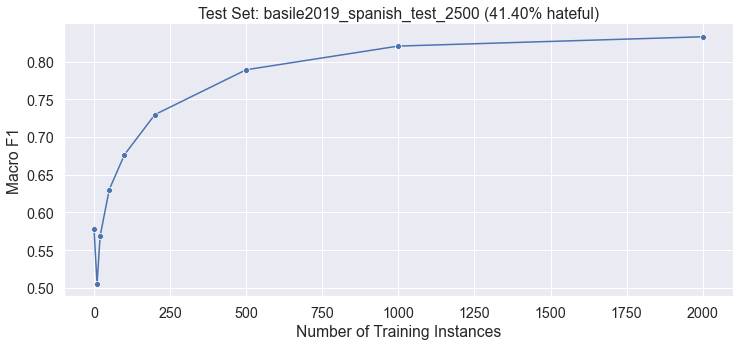

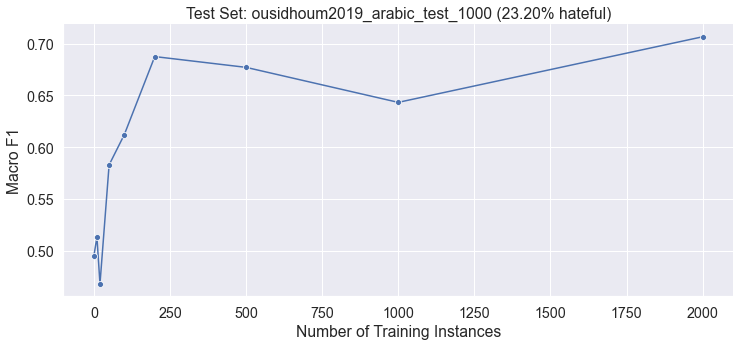

In [115]:
def build_graph(metrics_dict, results_dict, dataset):
    
    macro_f1 = list(metrics_dict[dataset].values())
    
    n_shot = []
    for model in metrics_dict[dataset]:
        if "dynabench" not in dataset and model == "xlmt_dynabench2021_english_20k_rs1":
            n_shot+=[0]
        else:
            n_shot+=[int(model.split("_")[-2].replace("k","000"))]
    
    prop_hate = results_dict[dataset][[i for i in results_dict[dataset]][0]].label.sum()/len(results_dict[dataset][[i for i in results_dict[dataset]][0]])
    
    f = plt.figure(figsize=(12,5))
    p = sns.lineplot(x=n_shot, y=macro_f1, marker="o")
    p.set_title("Test Set: {} ({:.2%} hateful)".format(dataset, prop_hate))
    p.set_xlabel("Number of Training Instances")
    p.set_ylabel("Macro F1")
    sns.despine()

for dataset in metrics_dict:
    #if "dynabench" not in dataset:
    build_graph(metrics_dict, results_dict, dataset)